In [1]:
# Import necessary modules first.
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/utkface.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/utkface.zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
BASE_DIR = '/content/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
# convert to dataframe
import pandas as pd
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  /content/UTKFace/32_0_0_20170114034605240.jpg....   32       0
1  /content/UTKFace/9_0_0_20170110225018913.jpg.c...    9       0
2  /content/UTKFace/65_0_0_20170117162833004.jpg....   65       0
3  /content/UTKFace/36_0_1_20170113151650223.jpg....   36       0
4  /content/UTKFace/36_0_1_20170117163412132.jpg....   36       0

In [5]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

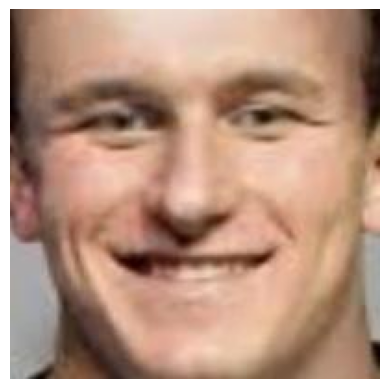

In [6]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

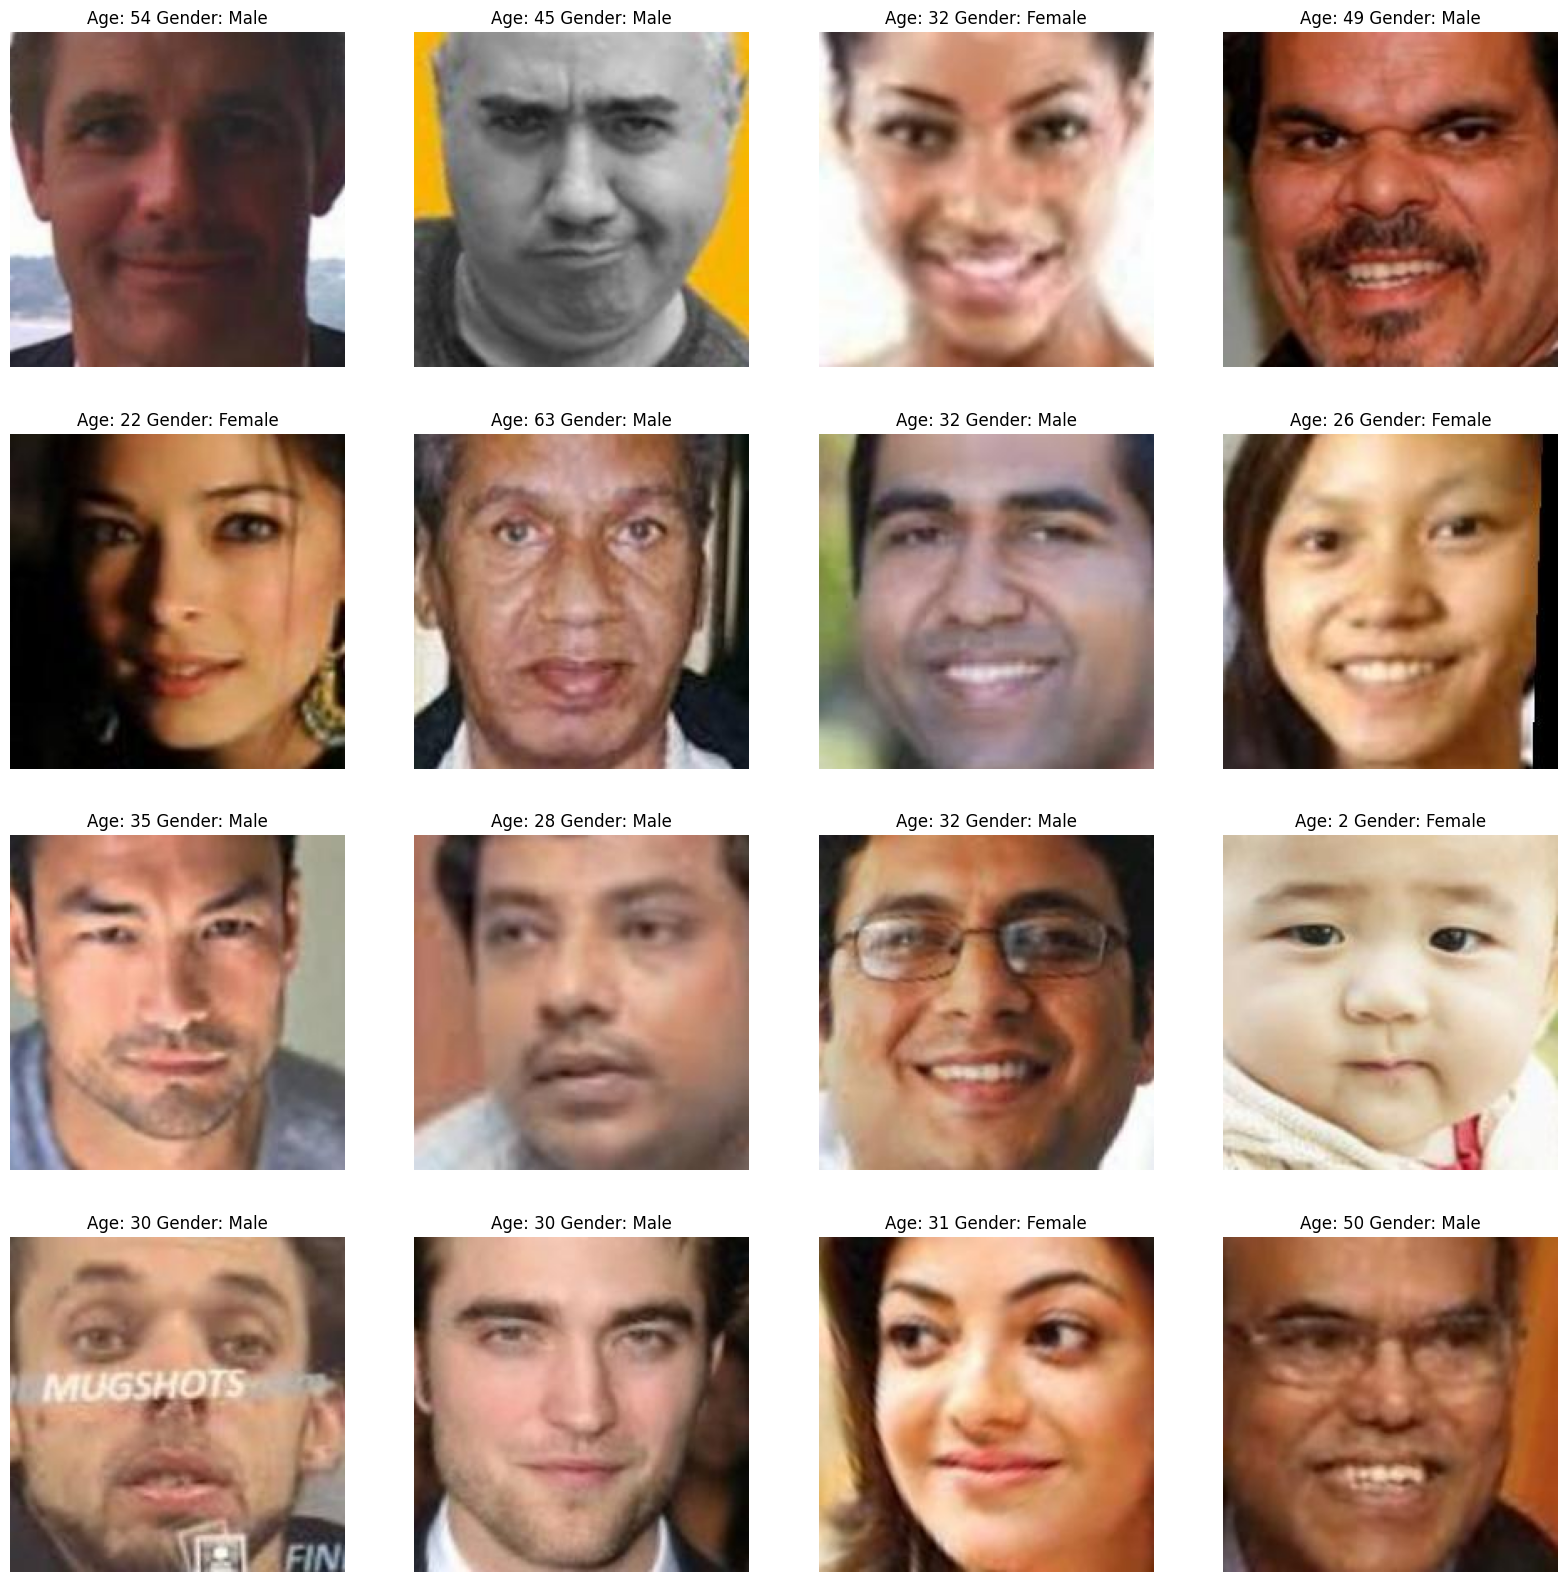

In [ ]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [8]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [9]:
X.shape

(23708, 128, 128, 1)

In [10]:
# normalize the images
X = X/255.0

In [11]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [12]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
dropout_2 = Dropout(0.4) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 24s 25ms/step - loss: 16.3629 - gender_out_loss: 0.6887 - age_out_loss: 15.6743 - gender_out_accuracy: 0.5403 - gender_out_mae: 0.4880 - age_out_accuracy: 0.0478 - age_out_mae: 15.6743 - val_loss: 16.6586 - val_gender_out_loss: 0.5609 - val_age_out_loss: 16.0977 - val_gender_out_accuracy: 0.7225 - val_gender_out_mae: 0.3941 - val_age_out_accuracy: 0.0449 - val_age_out_mae: 16.0977
Epoch 2/30
593/593 [==============================] - 13s 22ms/step - loss: 12.2434 - gender_out_loss: 0.5128 - age_out_loss: 11.7306 - gender_out_accuracy: 0.7479 - gender_out_mae: 0.3439 - age_out_accuracy: 0.0330 - age_out_mae: 11.7306 - val_loss: 10.8455 - val_gender_out_loss: 0.4200 - val_age_out_loss: 10.4255 - val_gender_out_accuracy: 0.8045 - val_gender_out_mae: 0.2576 - val_age_out_accuracy: 0.0230 - val_age_out_mae: 10.4255
Epoch 3/30
593/593 [==============================] - 12s 21ms/step - loss: 10.0968 - gender_out_loss: 0.4199 - age_out_loss

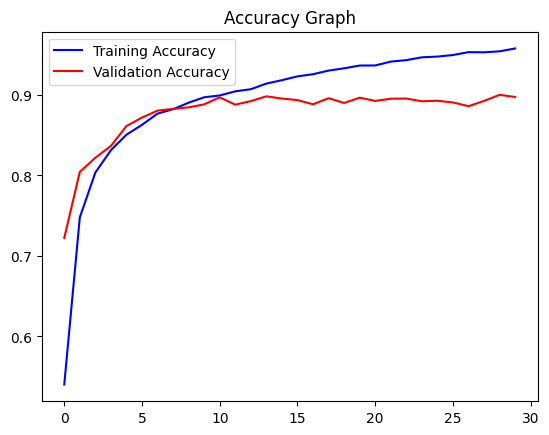

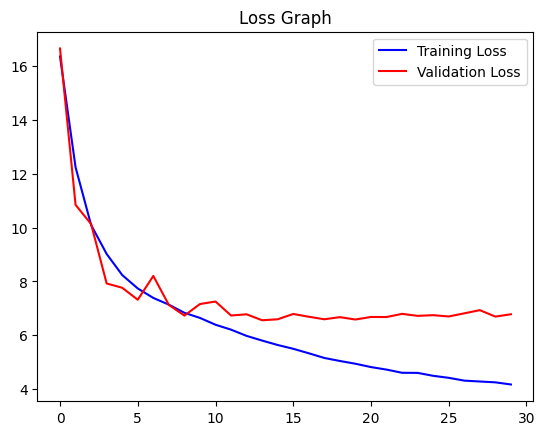

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

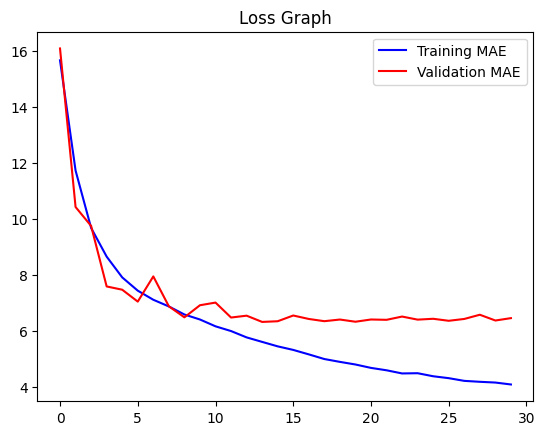

In [ ]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 35
1/1 [==============================] - 0s 362ms/step
Predicted Gender: Male Predicted Age: 37


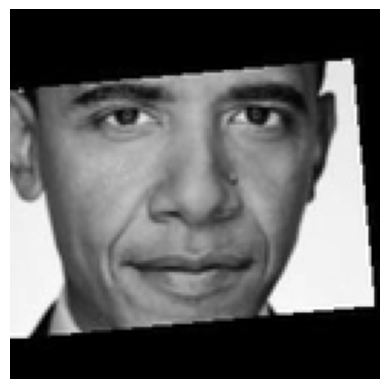

In [ ]:
image_index = 100
print("Original Gender:", gender_mapping[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_mapping[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 74
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Male Predicted Age: 65


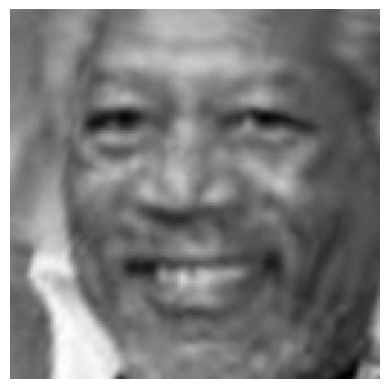

In [ ]:
image_index = 3000
print("Original Gender:", gender_mapping[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_mapping[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 28
1/1 [==============================] - 0s 17ms/step
Predicted Gender: Male Predicted Age: 28


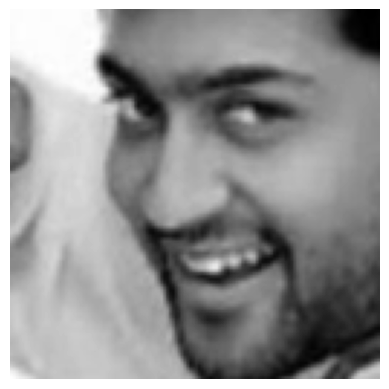

In [ ]:
image_index = 10000
print("Original Gender:", gender_mapping[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_mapping[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [ ]:
model.save('agengender.keras')

In [ ]:
model.save('agengender')

In [ ]:
model.save('agengender.h5')

In [ ]:
!zip -r agengender.zip /content/agengender


  adding: content/agengender/ (stored 0%)
  adding: content/agengender/saved_model.pb (deflated 88%)
  adding: content/agengender/keras_metadata.pb (deflated 93%)
  adding: content/agengender/assets/ (stored 0%)
  adding: content/agengender/variables/ (stored 0%)
  adding: content/agengender/variables/variables.index (deflated 69%)
  adding: content/agengender/variables/variables.data-00000-of-00001 (deflated 35%)
  adding: content/agengender/fingerprint.pb (stored 0%)


In [ ]:
new_model = tf.keras.models.load_model('agengender.h5')

# Show the model architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 32)         320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 64)           18496     ['max_pooling2d[0][0]']   

In [17]:
# Load the saved model
model = tf.keras.models.load_model('agengender.h5')




In [18]:
# Use the model to predict labels for all images
predictions = model.predict(X)

# Extract predicted gender and age labels
predicted_gender_labels = predictions[0].flatten()
predicted_age_labels = predictions[1].flatten()



741/741 [==============================] - 7s 5ms/step


In [19]:
# Compare predicted labels with ground truth labels
wrong_prediction_indices = []
for i in range(len(df)):
    if predicted_gender_labels[i] != y_gender[i] or predicted_age_labels[i] != y_age[i]:
        wrong_prediction_indices.append(i)

# Retrain the model on the identified images
# Assuming X_train and y_train are the features and labels of the identified images
X_train = X[wrong_prediction_indices]
y_gender_train = y_gender[wrong_prediction_indices]
y_age_train = y_age[wrong_prediction_indices]



In [ ]:
epochs = 30
# Define batch size
batch_size = 16  # You can adjust this value to fit within your available RAM

# Calculate the number of batches
num_batches = len(X_train) // batch_size

# Train the model in batches
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    for batch_index in range(num_batches):
        # Extract a batch of data
        batch_X = X_train[batch_index * batch_size : (batch_index + 1) * batch_size]
        batch_y_gender = y_gender_train[batch_index * batch_size : (batch_index + 1) * batch_size]
        batch_y_age = y_age_train[batch_index * batch_size : (batch_index + 1) * batch_size]

        # Train the model on the batch
        loss = model.train_on_batch(batch_X, [batch_y_gender, batch_y_age])

        # Print training progress
        print(f'Batch {batch_index + 1}/{num_batches}, Loss: {loss}')


Streaming output truncated to the last 5000 lines.
Batch 928/1481, Loss: [4.769607067108154, 0.021028965711593628, 4.748578071594238, 1.0, 0.0194769948720932, 0.0, 4.748578071594238]
Batch 929/1481, Loss: [5.094778537750244, 0.09092386066913605, 5.003854751586914, 0.9375, 0.06162387877702713, 0.0625, 5.003854751586914]
Batch 930/1481, Loss: [5.305914878845215, 0.0510806068778038, 5.254834175109863, 1.0, 0.04362268000841141, 0.0625, 5.254834175109863]
Batch 931/1481, Loss: [5.524899005889893, 0.046484656631946564, 5.478414535522461, 0.9375, 0.03418716788291931, 0.0, 5.478414535522461]
Batch 932/1481, Loss: [5.762321949005127, 0.02737196907401085, 5.734950065612793, 1.0, 0.02456621453166008, 0.0, 5.734950065612793]
Batch 933/1481, Loss: [3.5714616775512695, 0.048672281205654144, 3.522789478302002, 1.0, 0.04147740453481674, 0.0625, 3.522789478302002]
Batch 934/1481, Loss: [2.7650089263916016, 0.3638424873352051, 2.4011664390563965, 0.875, 0.13406935334205627, 0.0, 2.4011664390563965]
Batc

In [ ]:
# Save the retrained model as a new model
model.save('retrained_model')


In [ ]:
model.save('retrained_model.h5')


In [ ]:
!zip -r retrained_model.zip /content/retrained_model


  adding: content/retrained_model/ (stored 0%)
  adding: content/retrained_model/keras_metadata.pb (deflated 93%)
  adding: content/retrained_model/fingerprint.pb (stored 0%)
  adding: content/retrained_model/saved_model.pb (deflated 88%)
  adding: content/retrained_model/assets/ (stored 0%)
  adding: content/retrained_model/variables/ (stored 0%)
  adding: content/retrained_model/variables/variables.index (deflated 70%)
  adding: content/retrained_model/variables/variables.data-00000-of-00001 (deflated 36%)


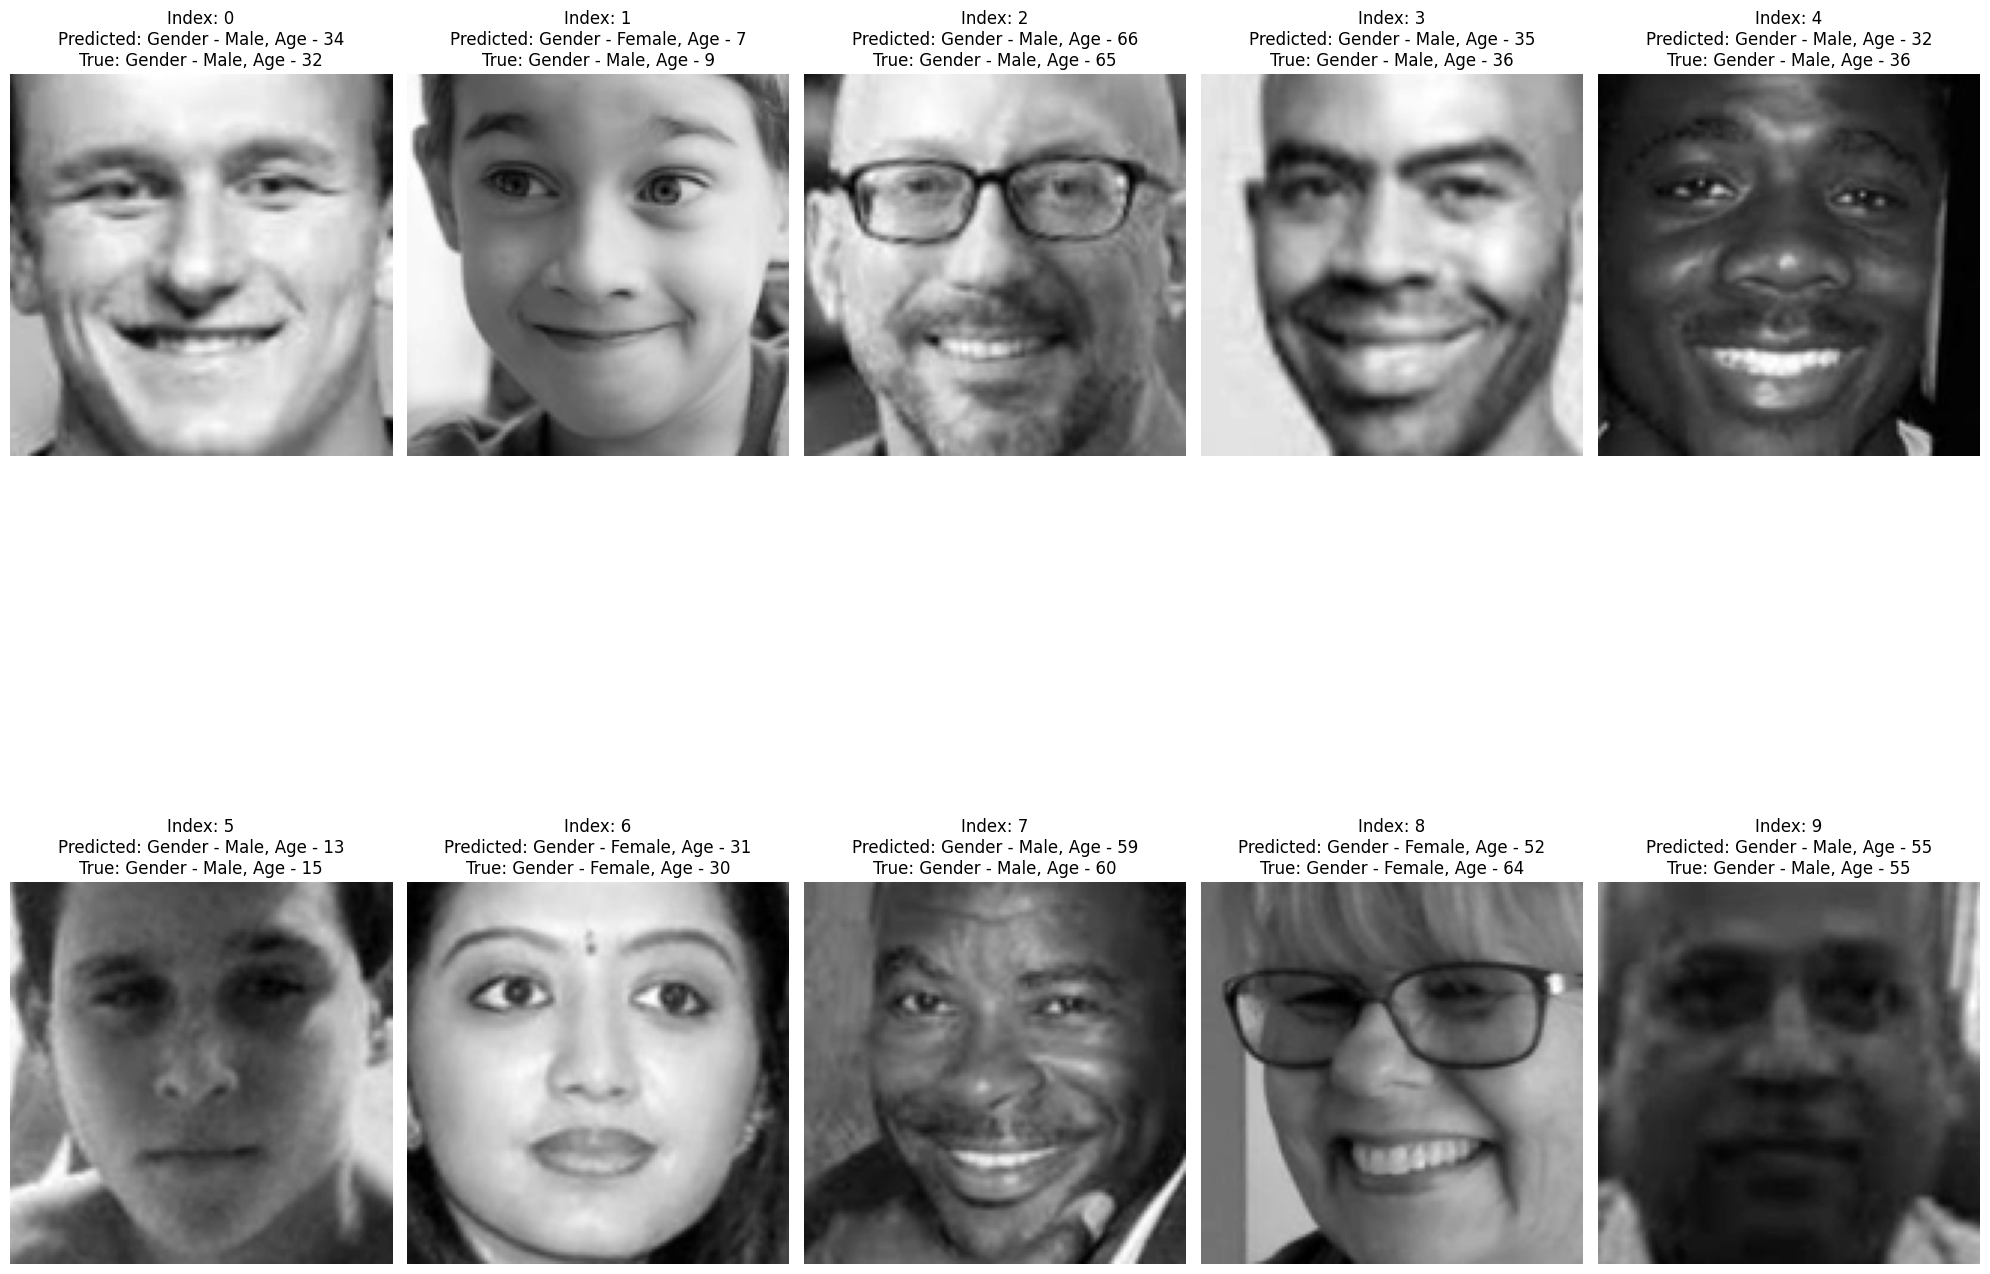

In [20]:
# Visualize the 10 images that were predicted wrong
plt.figure(figsize=(20, 20))
for i in range(10):
    index = wrong_prediction_indices[i]
    img = X[index].reshape(128, 128)  # Reshape the image to 2D
    predicted_gender = gender_mapping[round(predicted_gender_labels[index])]
    predicted_age = round(predicted_age_labels[index])
    true_gender = gender_mapping[y_gender[index]]
    true_age = y_age[index]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Index: {index}\nPredicted: Gender - {predicted_gender}, Age - {predicted_age}\nTrue: Gender - {true_gender}, Age - {true_age}', fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
# Load the retrained model
retrained_model = tf.keras.models.load_model('retrained_model.h5')


In [21]:
del model


1/1 [==============================] - 0s 19ms/step


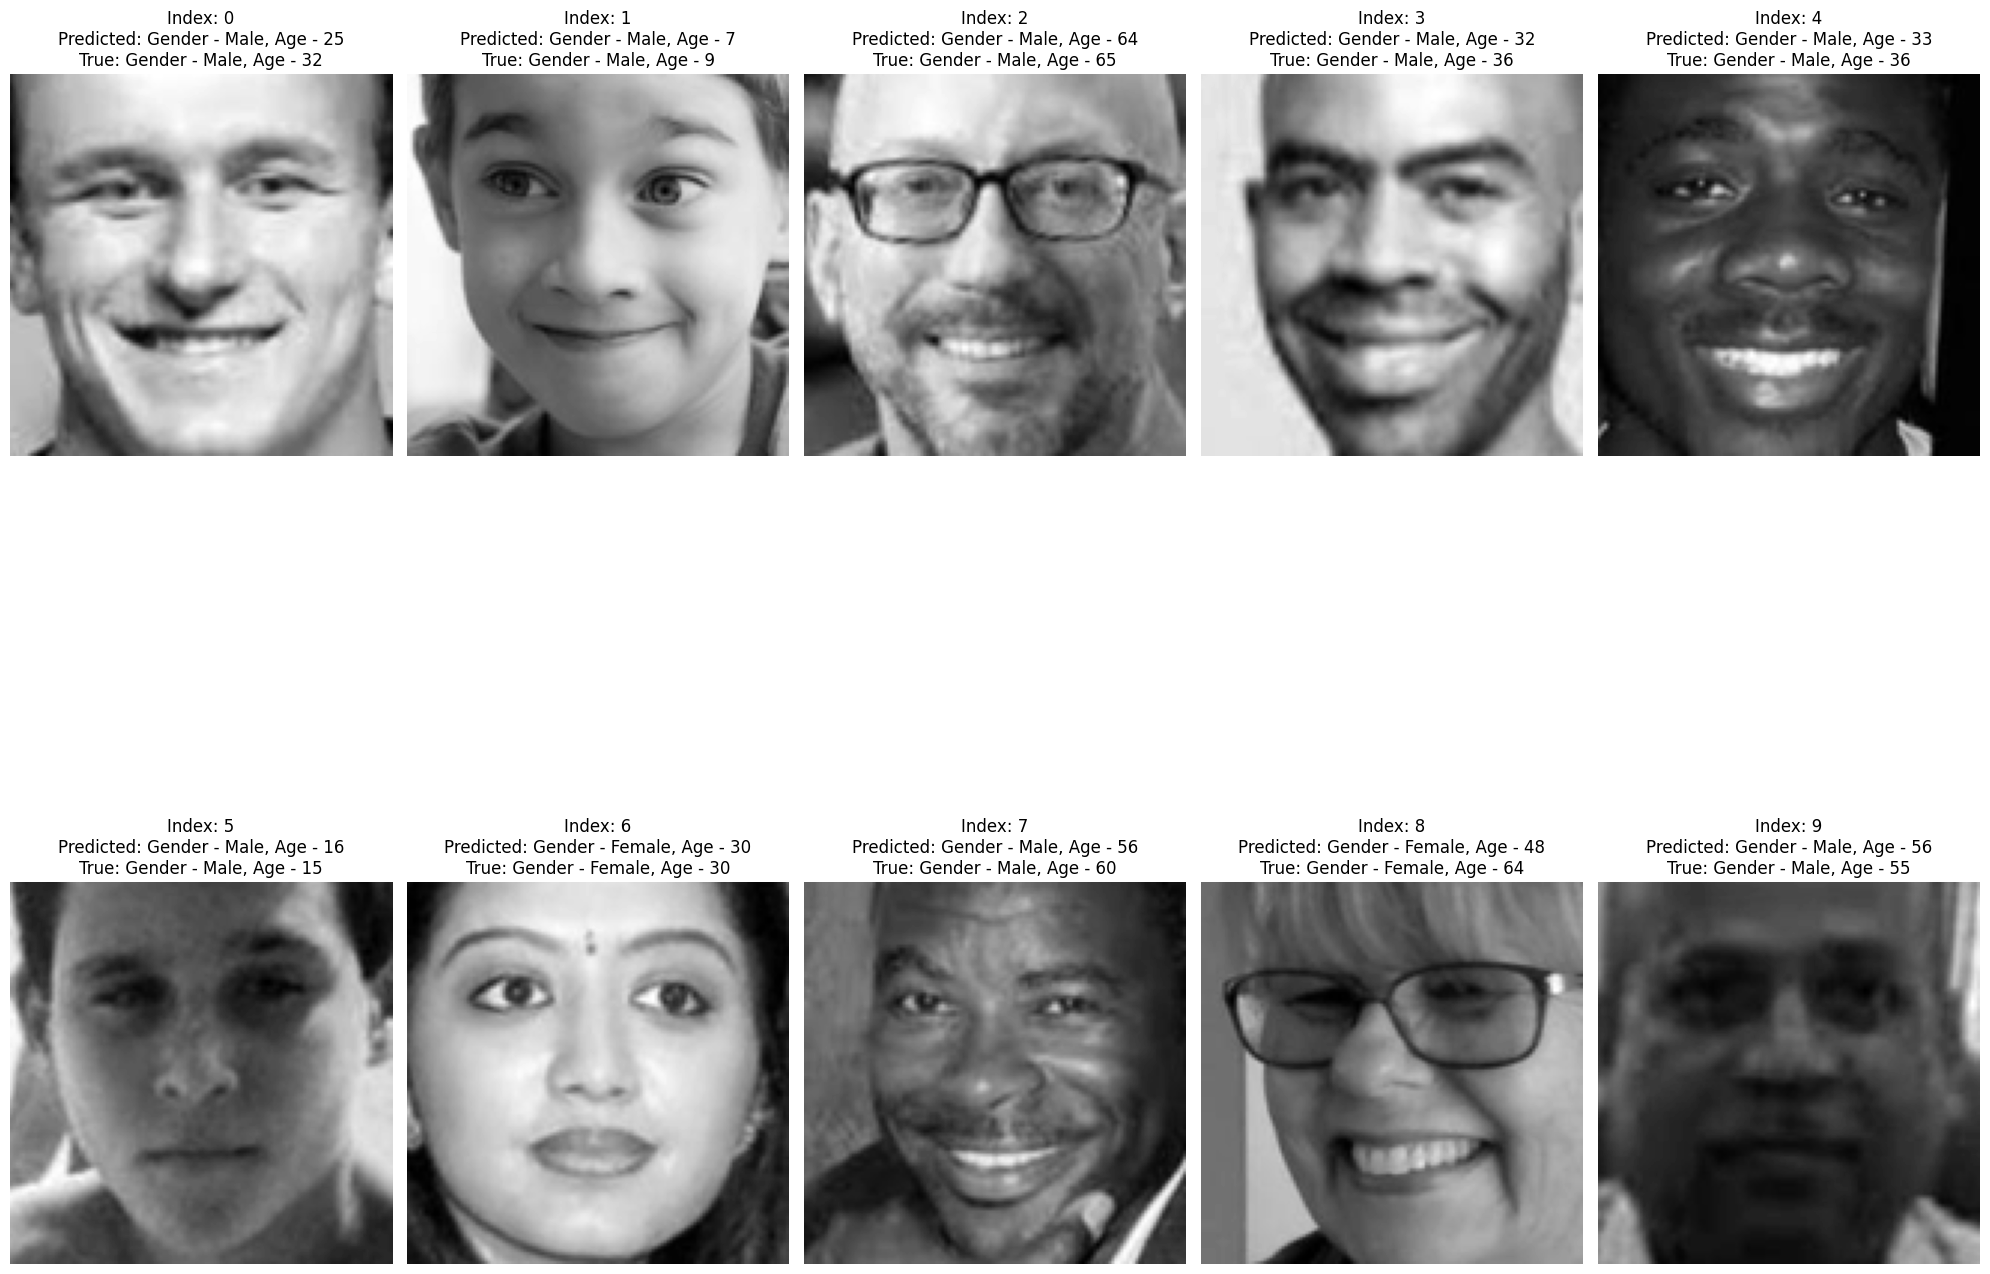

In [29]:
# Use the retrained model to predict labels for a subset of images
subset_indices = wrong_prediction_indices[:10]  # Limiting to the first 10 images for demonstration
subset_predictions = []

for index in subset_indices:
    img = X[index].reshape(1, 128, 128, 1)  # Reshape the image to match the model's input shape
    prediction = retrained_model.predict(img)
    subset_predictions.append(prediction)

plt.figure(figsize=(20, 20))
# Display the predictions for the subset of images
for i, index in enumerate(subset_indices):
    img = X[index].reshape(128, 128)  # Reshape the image to 2D

    # Extract predicted gender and age from the NumPy array and round them
    predicted_gender = gender_mapping[int(round(subset_predictions[i][0][0][0]))]
    predicted_age = round(subset_predictions[i][1][0][0])

    true_gender = gender_mapping[y_gender[index]]
    true_age = y_age[index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Index: {index}\nPredicted: Gender - {predicted_gender}, Age - {predicted_age}\nTrue: Gender - {true_gender}, Age - {true_age}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

